
IBM-Project-5771-1658814926

ASSIGNMENT-3




Building a Regression Model

1. Import Libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Load the dataset into the tool

In [16]:
data = pd.read_csv("abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [17]:
data.shape

(4177, 9)

Additional Task

Convert Ring column into Age column (by adding 1.5)

In [18]:
Age = 1.5 + data.Rings
data["Age"] = Age
data = data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


3.Perform Below Visualizations

Univariate Analysis

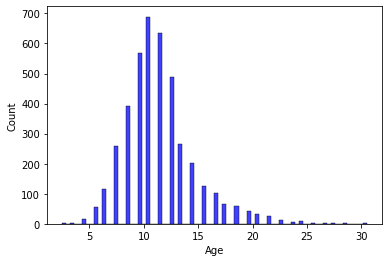

In [19]:
sns.histplot(x=data.Age,color='Blue')


Bi-Variate Analysis

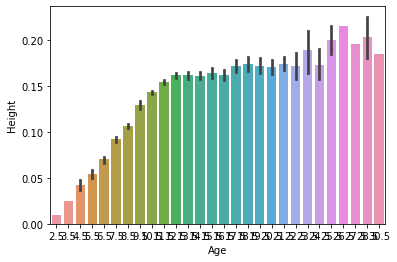

In [20]:
sns.barplot(x=data.Age,y=data.Height)

Multi-Variate Analysis

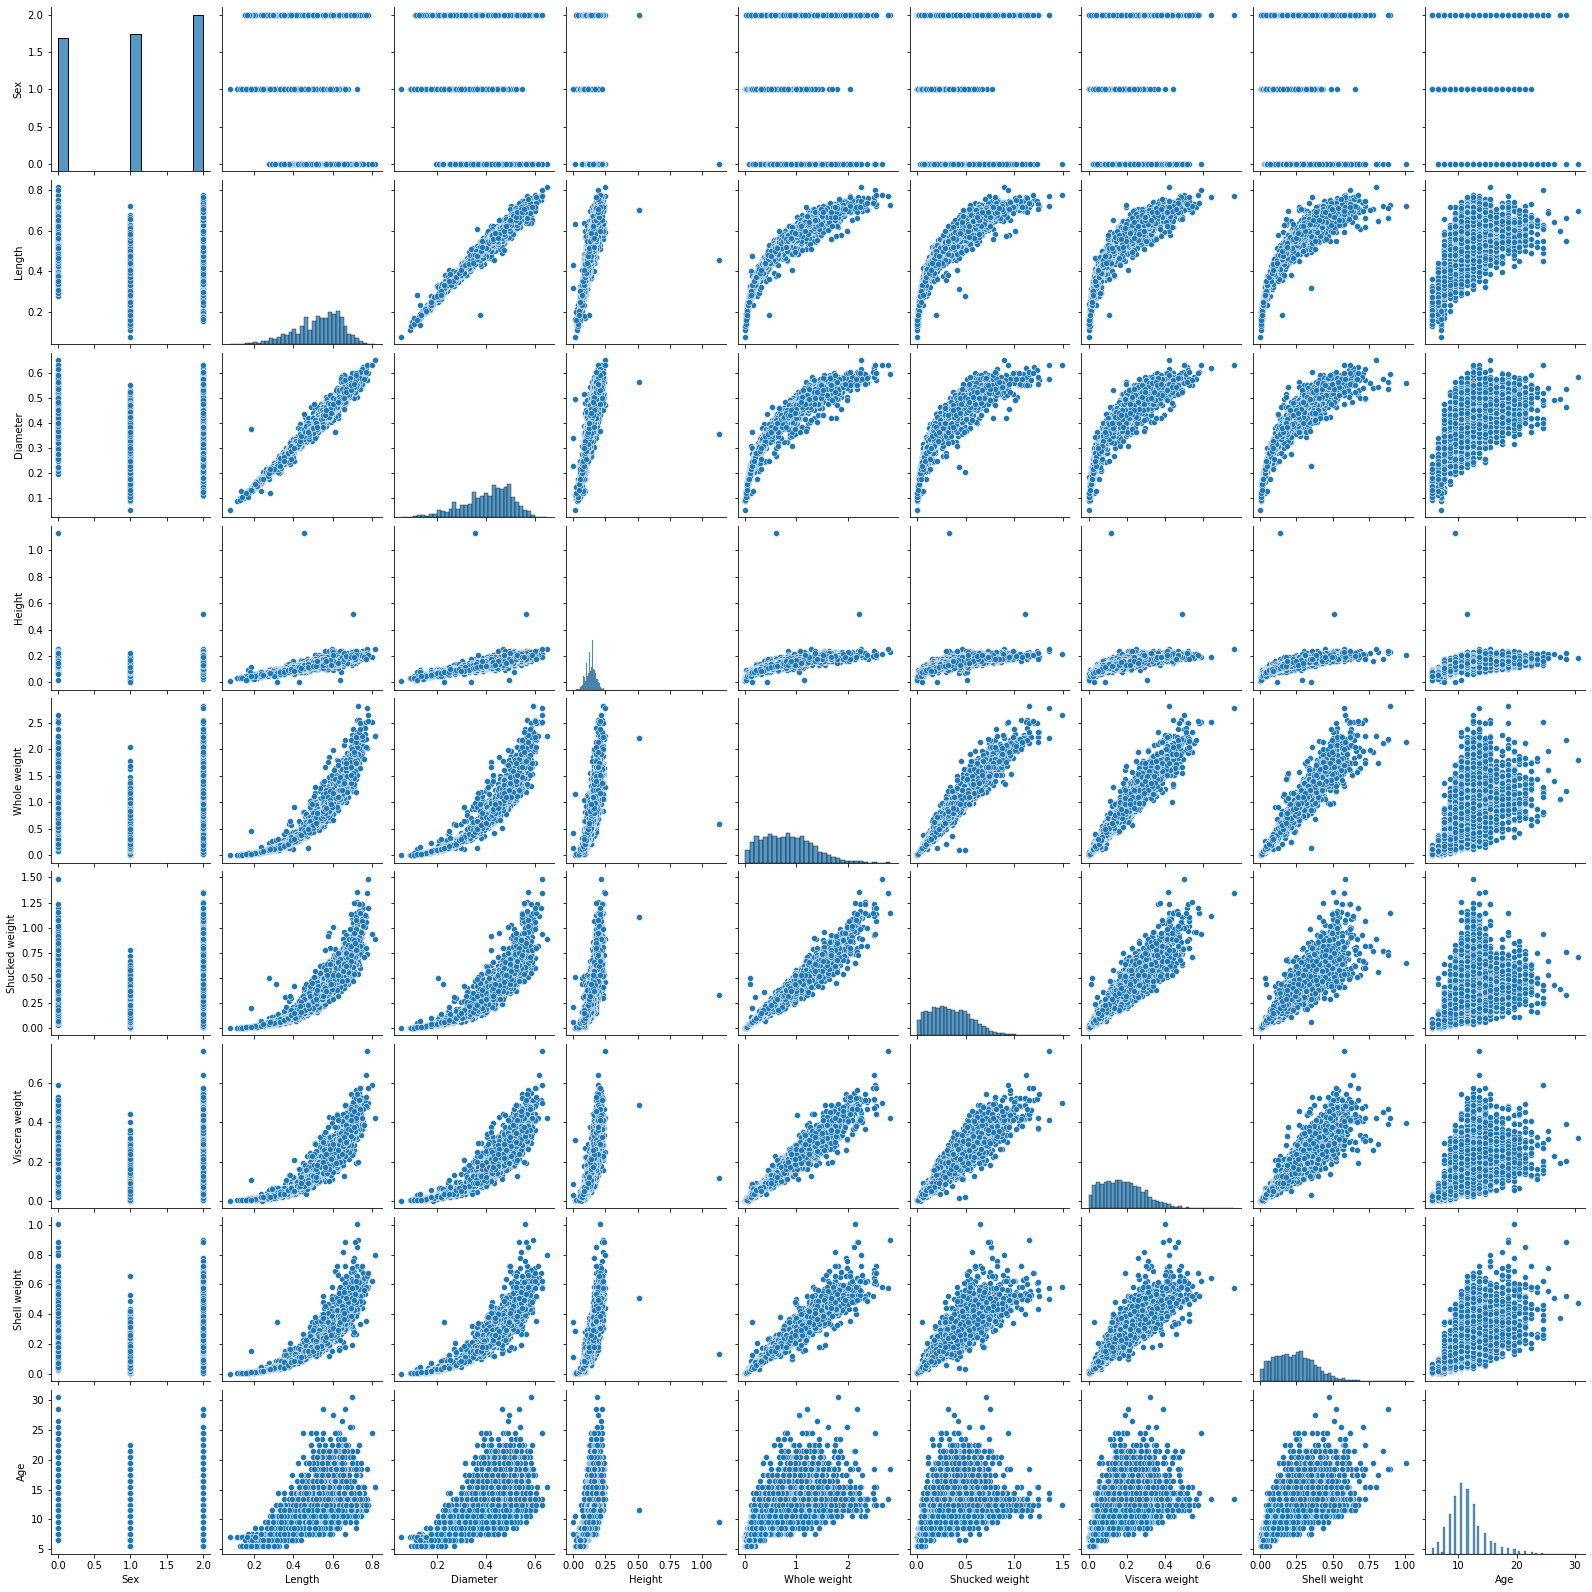

In [47]:
sns.pairplot(data)

4. Perform descriptive statistics on the dataset

In [22]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


5. Check for Missing values and deal with them

In [23]:
data.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
dtype: bool

In [24]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

6. Find the outliers and replace them outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


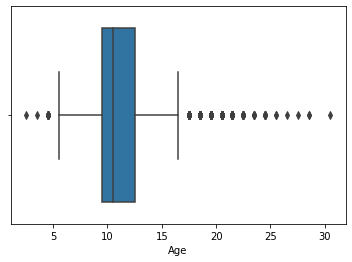

In [25]:
sns.boxplot(data.Age)

In [26]:
outliers=data.quantile(q=(0.25,0.75))
outliers

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5


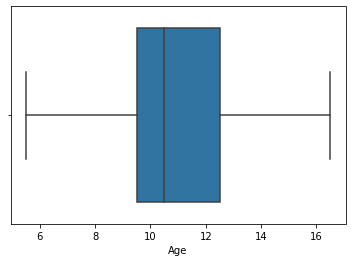

In [27]:
q1=data.Age.quantile(0.25)
q3=data.Age.quantile(0.75)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

data['Age']= np.where(data['Age']<lower_limit,7,data['Age'])
sns.boxplot(x=data.Age,showfliers=False)

7. Check for Categorical columns and perform encoding
]
Label encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data.Sex=le.fit_transform(data.Sex)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


8. Split the data into dependent and independent variables
 
 ( i ) Independent variable

In [29]:
x=data.drop(columns=['Sex'],axis = 1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


( ii ) Dependent variable

In [30]:
y = data.Sex
y.head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int64

9.Scale the independent variables

In [31]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.577830
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.919022
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.294809
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.017298
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.919022


10. Split the data into training and testing

In [32]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [33]:
X_Train.shape

(3341, 8)

In [34]:
X_Test.shape

(836, 8)

In [35]:
Y_Train.shape

(3341,)

In [36]:
Y_Test.shape

(836,)

11. Build the Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [38]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [39]:
y_predict = model.predict(X_Test)

In [40]:
y_predict_train = model.predict(X_Train)

12. Train the Model

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.983837174498653


13. Test the Model

In [43]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

Testing accuracy:  0.5574162679425837


14. Measure the performance using Metrics

In [45]:
pd.crosstab(Y_Test,y_predict)

col_0,0,1,2
Sex,,,
0,128,24,97
1,40,215,36
2,109,64,123


In [46]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           0       0.46      0.51      0.49       249
           1       0.71      0.74      0.72       291
           2       0.48      0.42      0.45       296

    accuracy                           0.56       836
   macro avg       0.55      0.56      0.55       836
weighted avg       0.55      0.56      0.55       836

